# Лабораторная работа №1. Регрессия

**Тема:** *Сравнение линейной регрессии, случайного леса (Random Forest Regressor), градиентного бустинга (XGBoost) на задаче регрессии.*

**Цели:**

- *Научиться строить, оптимизировать и оценивать регрессионные модели.*
- *Понять, как интерпретировать важность признаков (feature importance).*
- *Понять, как увеличивать кол-во признаков (feature tuning).*
- *Исследовать влияние преобразований признаков (фичей), регуляризации и гиперпараметров.*

**Условия:**

- *numpy, pandas, scikit-learn, XGBoost*
- *выбрать датасет для 1-ой и 2-ой лабораторной работы*

**Пункты:**

1. Подготовка данных + Feature Tuning
2. Создание метрик
3. Базовая модель линейной регрессии
4. Улучшение линейной регрессии
5. Случайный лес регрессор
6. Градиентный бустинг (XGBoost)
7. Feature Importance
8. Написание своих реализаций (классы)
9. Подведение итогов


## О команде

| Фамилия И.О.        | Группа | Роль в команде | Что делал(а)                    |
|---------------------|--------|----------------|------------------------------|
| Глебова М. А         | 307    | data-scientist | EDA, feature tuning, обучение       |

 Датасет: [Abalone Data Set](https://code.datasciencedojo.com/zhangyuan/datasets/tree/master/Abalone)

## Описание датасета

Data Science Dojo <br/>  
Авторские права (c) 2019 - 2020

---

**Уровень:** Начинающий <br/>
**Рекомендуемое использование:** Модели регрессии<br/>
**Область применения:** Экология (Environment)<br/> 

## Набор данных Abalone (Abalone Data Set)

### Определение возраста моллюска *Abalone* по физическим измерениям

Этот набор данных **для начинающих** содержит 4177 строк и 9 столбцов с физическими измерениями моллюсков *abalone* и количеством колец (Rings), отражающих возраст особи.  

Возраст моллюска *abalone* определяется путём разрезания раковины через конус, окрашивания и подсчёта количества колец под микроскопом — это скучная и трудоёмкая задача.  
Другие измерения, которые проще получить, используются для предсказания возраста.

Этот набор данных рекомендуется для изучения и практики навыков в области **анализа данных (exploratory data analysis)**, **визуализации данных (data visualization)** и **методов моделирования классификации**.  
Не стесняйтесь исследовать данные с помощью различных **обучаемых (supervised)** и **неконтролируемых (unsupervised)** методов машинного обучения.  
Ниже приведён словарь данных с дополнительной информацией:

---

### Словарь данных (Data Dictionary)

| Позиция столбца | Название признака (Attribute Name) | Описание | Тип данных | Пример | Доля пропущенных значений (%) |
|------------------|------------------------------------|----------|------------|--------|-------------------------------|
| 1 | Sex | Пол (M: мужской, F: женский, I: младенец / infant) | Качественный (Quantitative) | "M", "F", "I" | 0 |
| 2 | Length | Наибольшее измерение раковины (миллиметры — mm) | Количественный (Qualitative) | 0.530, 0.440, 0.425 | 0 |
| 3 | Diameter | Диаметр — перпендикулярно длине (mm) | Количественный (Qualitative) | 0.350, 0.380, 0.300 | 0 |
| 4 | Height | Высота — с мясом внутри раковины (mm) | Количественный (Qualitative) | 0.095, 0.150, 0.110 | 0 |
| 5 | Whole_weight | Вес всего моллюска (граммы) | Количественный (Qualitative) | 0.5140, 0.2255, 0.6845 | 0 |
| 6 | Shucked_weight | Вес мяса (граммы) | Количественный (Qualitative) | 0.1940, 0.1675, 0.0975 | 0 |
| 7 | Viscera_weight | Вес внутренностей после кровопускания (граммы) | Количественный (Qualitative) | 0.1010, 0.1495, 0.0490 | 0 |
| 8 | Shell_weight | Вес раковины — после высушивания (граммы) | Количественный (Qualitative) | 0.330, 0.115, 0.245 | 0 |
| 9 | Rings | Количество колец — значение +1.5 даёт возраст в годах (например, 4 кольца = 5.5 лет) | Количественный (Qualitative) | 19, 8, 29 | 0 |

> ⚠️ Примечание: в оригинальной таблице указаны некорректные типы данных — «Qualitative» (качественные) используется для непрерывных числовых переменных. На самом деле, все признаки, кроме `Sex`, являются количественными (numerical / continuous). `Sex` — категориальный признак.

# 1. EDA

## 1.1. Подготовка данных

In [1]:
RANDOM_SEED = 310
DATA_DIR = 'Abalone'
DATASET_FILENAME = 'abalone.data.csv'
TARGET = 'rings'

In [2]:
import os
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

os.environ['PYTHONHASHSEED'] = str(RANDOM_SEED)  # влияет на хеширование в Python
random.seed(RANDOM_SEED)  # для модуля random
np.random.seed(RANDOM_SEED)  # для NumPy
# pd.options.mode.chained_assignment = None  # отключает предупреждения pandas

# Для scikit-learn нет глобального seed, необходимо передавать random_state=RANDOM_SEED в функции
# Например, train_test_split(..., random_state=SEED)

In [3]:
column_names = ('sex', 'length', 'diameter',
                'height', 'whole_weight', 'shucked_weight',
                'viscera_weight', 'shell_weight', 'rings')
df = pd.read_csv(os.path.join(DATA_DIR, DATASET_FILENAME), names=column_names)

## 1.2. Изучение данных

In [4]:
df.head()

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


Посмотрим общую информацию о датасете

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sex             4177 non-null   object 
 1   length          4177 non-null   float64
 2   diameter        4177 non-null   float64
 3   height          4177 non-null   float64
 4   whole_weight    4177 non-null   float64
 5   shucked_weight  4177 non-null   float64
 6   viscera_weight  4177 non-null   float64
 7   shell_weight    4177 non-null   float64
 8   rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


**Вывод**: Датасет среднего размера (4177 объектов), содержит преимущественно непрерывные признаки, один категориальный признак (пол), а также целочисленный таргет (количество колец, по которому делается предсказание возраста путём прибавления 1.5)

Посмотрим на пропуски

In [6]:
df.isna().sum()

sex               0
length            0
diameter          0
height            0
whole_weight      0
shucked_weight    0
viscera_weight    0
shell_weight      0
rings             0
dtype: int64

**Вывод:** пропусков нет

## 1.3. Распределения данных и взаимодействие признаков

Посмотрим на общую описательную статистику всех числовых признаков

In [7]:
df.describe()

,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [8]:
df.describe(include=['object'])

,sex
count,4177
unique,3
top,M
freq,1528


**Выводы:**

1. В датасете возможно есть выбросы, связанные с размерами морского ушка:
    1. Минимальное значение height = 0.0 - это аномалия, возможно это пропущенное значение, заменённое нулем, возможно это погрешность вычисления
    2. Максимально значение height 1.13 значительно больше его медианы 0.14, что может свидетельствовать о выбросах
2. Разброс у признака rings достаточно большой. Средний возраст морского ушка - 11.4 года, это выше медианы: 10.5 лет
3. Разброс у признака whole_weight также достаточно большой. Вес самого тяжёлого ушка больше среднего на 4 сигмы, возможно это выброс.
3. Признаки имеют разный масштаб, неотрицательны
4. Почти для каждого признака медиана близка к середине (разница между медианой и средним значением значителььно меньше одной сигмы)

Итак, необходима обработка height == 0, рассмотреть логарифмирование признаков и таргета для уменьшения влияния выбросов.

Рассмотрим распределения таргета и признаков

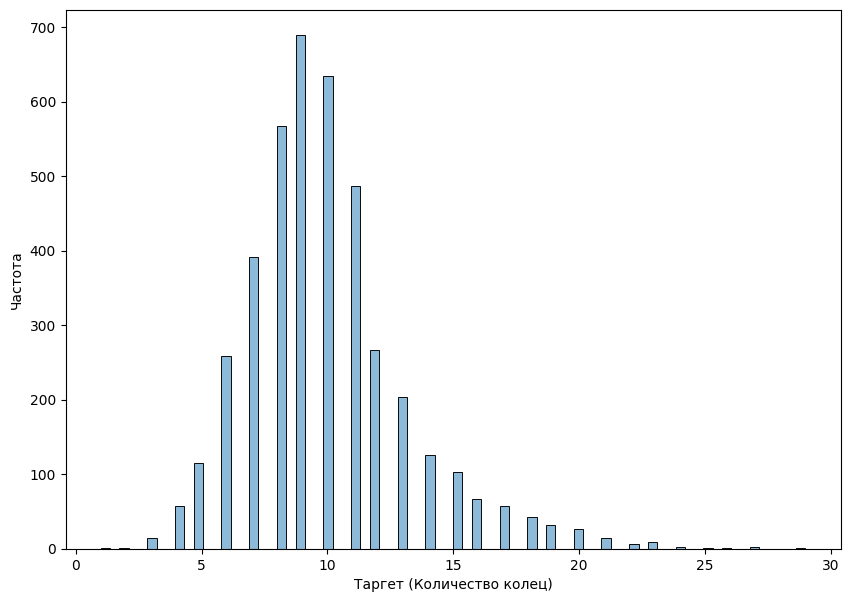

In [9]:
plt.figure(figsize=(10, 7))
sns.histplot(df[TARGET], alpha=0.5)
plt.xlabel('Таргет (Количество колец)')
plt.ylabel('Частота')
plt.show()

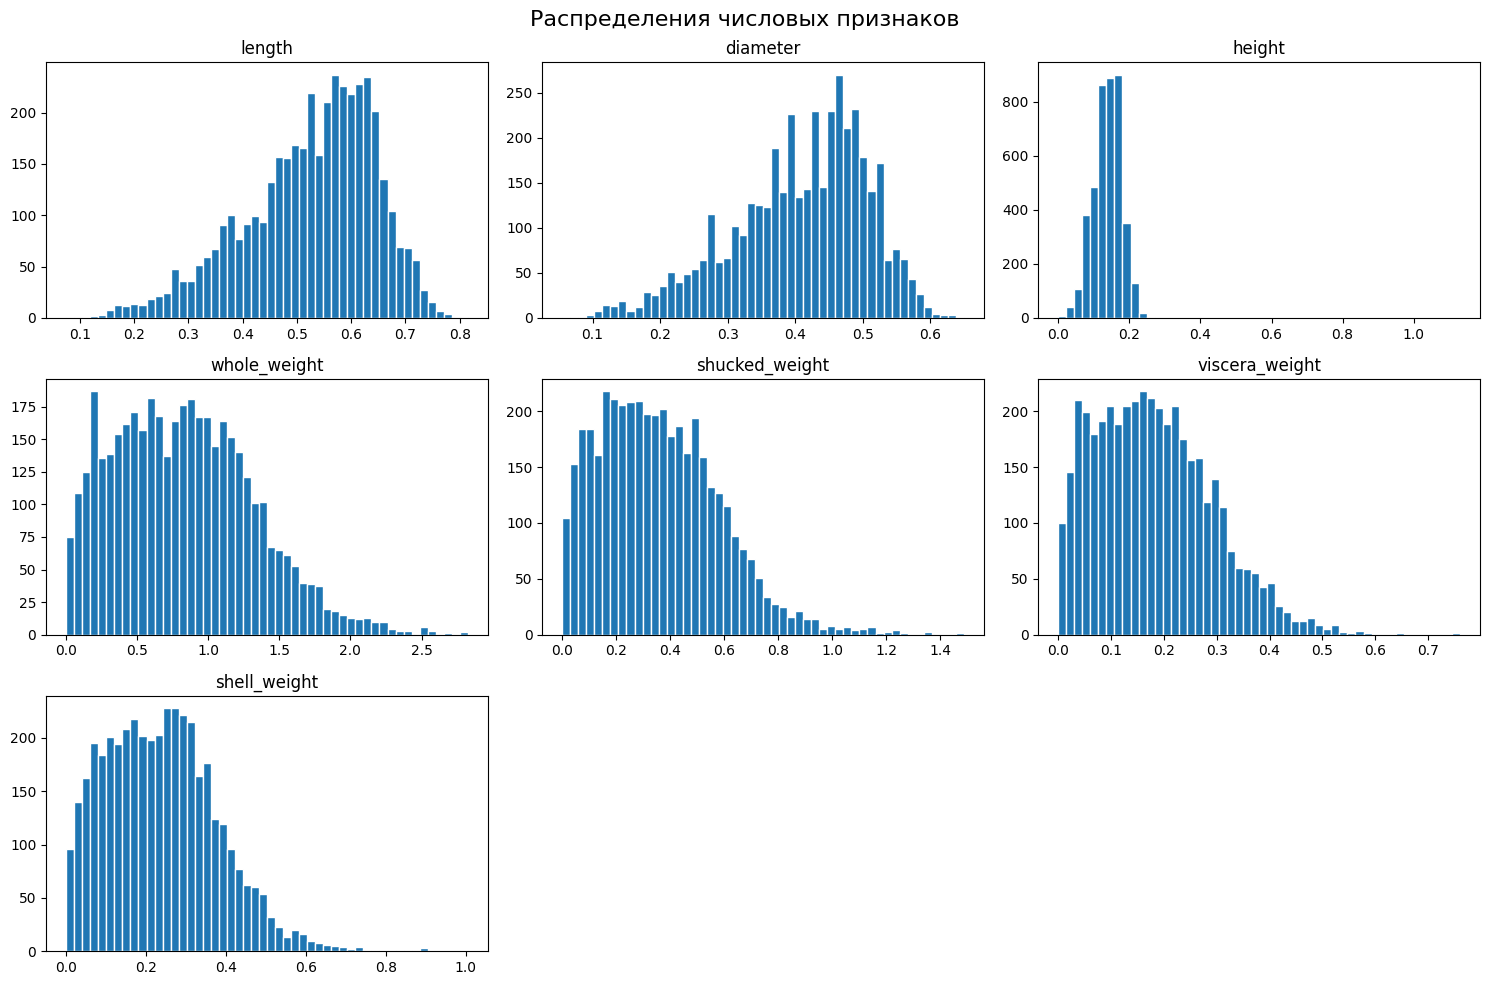

In [10]:
df.drop(columns=[TARGET]).hist(figsize=(15, 10), bins=50, edgecolor='white')
plt.suptitle("Распределения числовых признаков", fontsize=16)
plt.tight_layout()
for ax in plt.gcf().axes:
    ax.grid(False)
plt.show()

**Выводы:**

1. У таргета сильный хвост вправо, можно рассмотреть логарифимрование
2. Признаки размера имеют смещение вправо, у length и diameter большой хвост влево
3. Признаки отвечающие за вес имеют правые хвосты

Глянем на корреляцию признаков

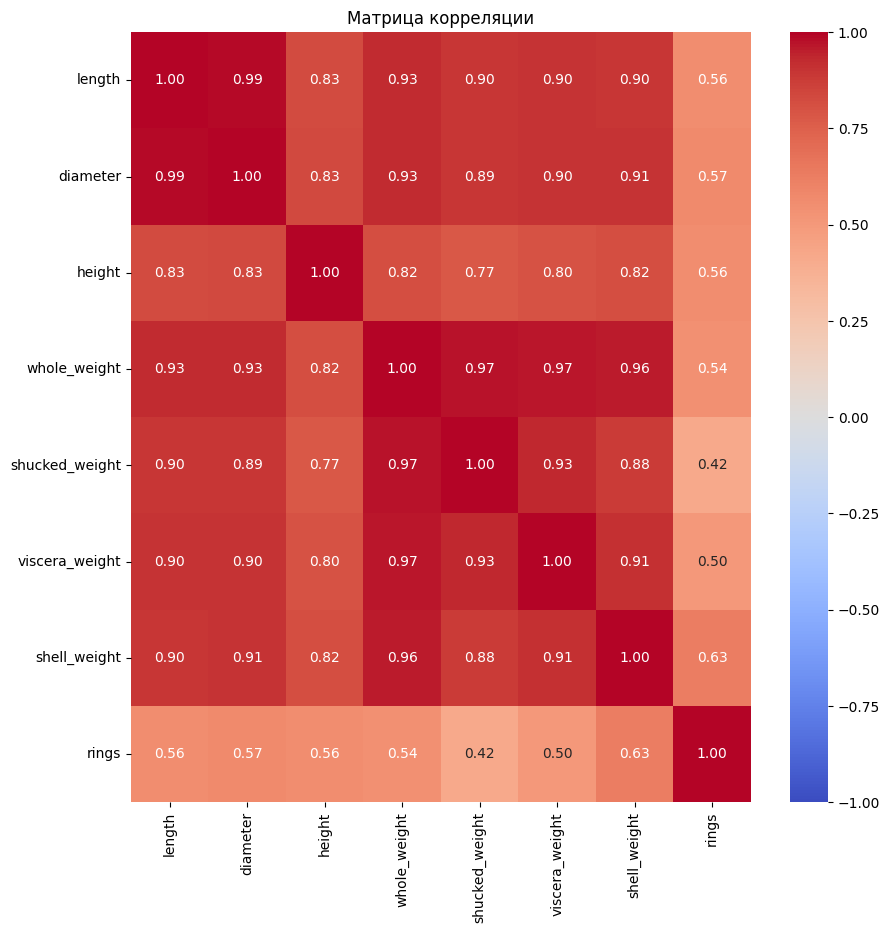

In [11]:
def draw_corr_matrix(df: pd.DataFrame, include_target: bool = False):
    df_numeric = df.select_dtypes(include='number')
    if not include_target:
        df_numeric = df_numeric.drop(columns=[TARGET])
    plt.figure(figsize=(10, 10))
    sns.heatmap(df_numeric.corr(), annot=True, fmt=".2f", cmap='coolwarm', center=0, vmin=-1, vmax=1)
    plt.title("Матрица корреляции")
    plt.show()

draw_corr_matrix(df, include_target=True)

**Вывод:** Признаки скоррелированы между собой очень сильно, а с таргетом - слабо. Нужна предобработка данных

# 2. Feature tuning

## 2.1. Метрики и бейзлайн

Для понимания в каком направлении мы движимся, будем использовать LinearRegression модель для оценки качества. Напишем функцию для тестирования

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, r2_score

def evaluate(y_pred, y_true):
    # Считаем метрики
    rmse = root_mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    return {'RMSE': rmse, 'MAE': mae, 'R2': r2}

def log(evaluated):
    print(f"RMSE: {evaluated['RMSE']:.4f}")
    print(f"MAE:  {evaluated['MAE']:.4f}")
    print(f"R2:   {evaluated['R2']:.4f}")

def train_and_evaluate(train, test):
    if TARGET not in train.columns or TARGET not in test.columns:
        raise ValueError(f"Целевой столбец '{TARGET}' отсутствует в данных.")

    numeric_features = train.select_dtypes(include='number').columns.tolist()
    numeric_features.remove(TARGET)
    
    # Разделяем признаки и таргет
    X_train = train[numeric_features]
    y_train = train[TARGET]
    X_test = test[numeric_features]
    y_test = test[TARGET]
    
    # Создаём и обучаем модель
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Предсказание на тесте
    y_pred = model.predict(X_test)
    
    return evaluate(y_pred, y_test)

Для проверки работоспособности создадим простой бейзлайн и посмотрим на качество

In [13]:
train: pd.DataFrame
test: pd.DataFrame

train, test = train_test_split(df, test_size=0.1, random_state=RANDOM_SEED)

In [14]:
rings_per_diameter = (train['rings'] / train['diameter']).mean()
log(evaluate(test['diameter'] * rings_per_diameter, test['rings']))

RMSE: 2.7315
MAE:  2.0646
R2:   0.2924


И посмотрим как поведёт себя линейная модель без какой-либо предобработки

In [15]:
log(train_and_evaluate(train, test))

RMSE: 2.1744
MAE:  1.5200
R2:   0.5516


## 2.2. Логарифмирование, нормализация и чистка выбросов

Для начала посмотрим на зависимость признаков

In [16]:
from math import ceil, sqrt

def draw_dependence(df: pd.DataFrame):
    features = [col for col in df.columns if col != TARGET]
    n = ceil(sqrt(len(features)))
    fig, axes = plt.subplots(nrows=n, ncols=n, figsize=(15, 10))
    fig.suptitle('Зависимость таргета от признаков')

    if n == 1:
        axes = [[axes]]
    elif n > 1 and len(features) == 1:
        axes = [[axes]]
    else:
        axes = axes.reshape(n, n) if isinstance(axes, np.ndarray) else axes

    for i, feature in enumerate(features):
        row = i // n
        col_idx = i % n
        axes[row][col_idx].scatter(df[feature], df[TARGET], s=1)
        axes[row][col_idx].set_xlabel(feature)

    for i in range(len(features), n * n):
        row = i // n
        col_idx = i % n
        axes[row][col_idx].axis('off')
    
    plt.tight_layout()
    plt.show()

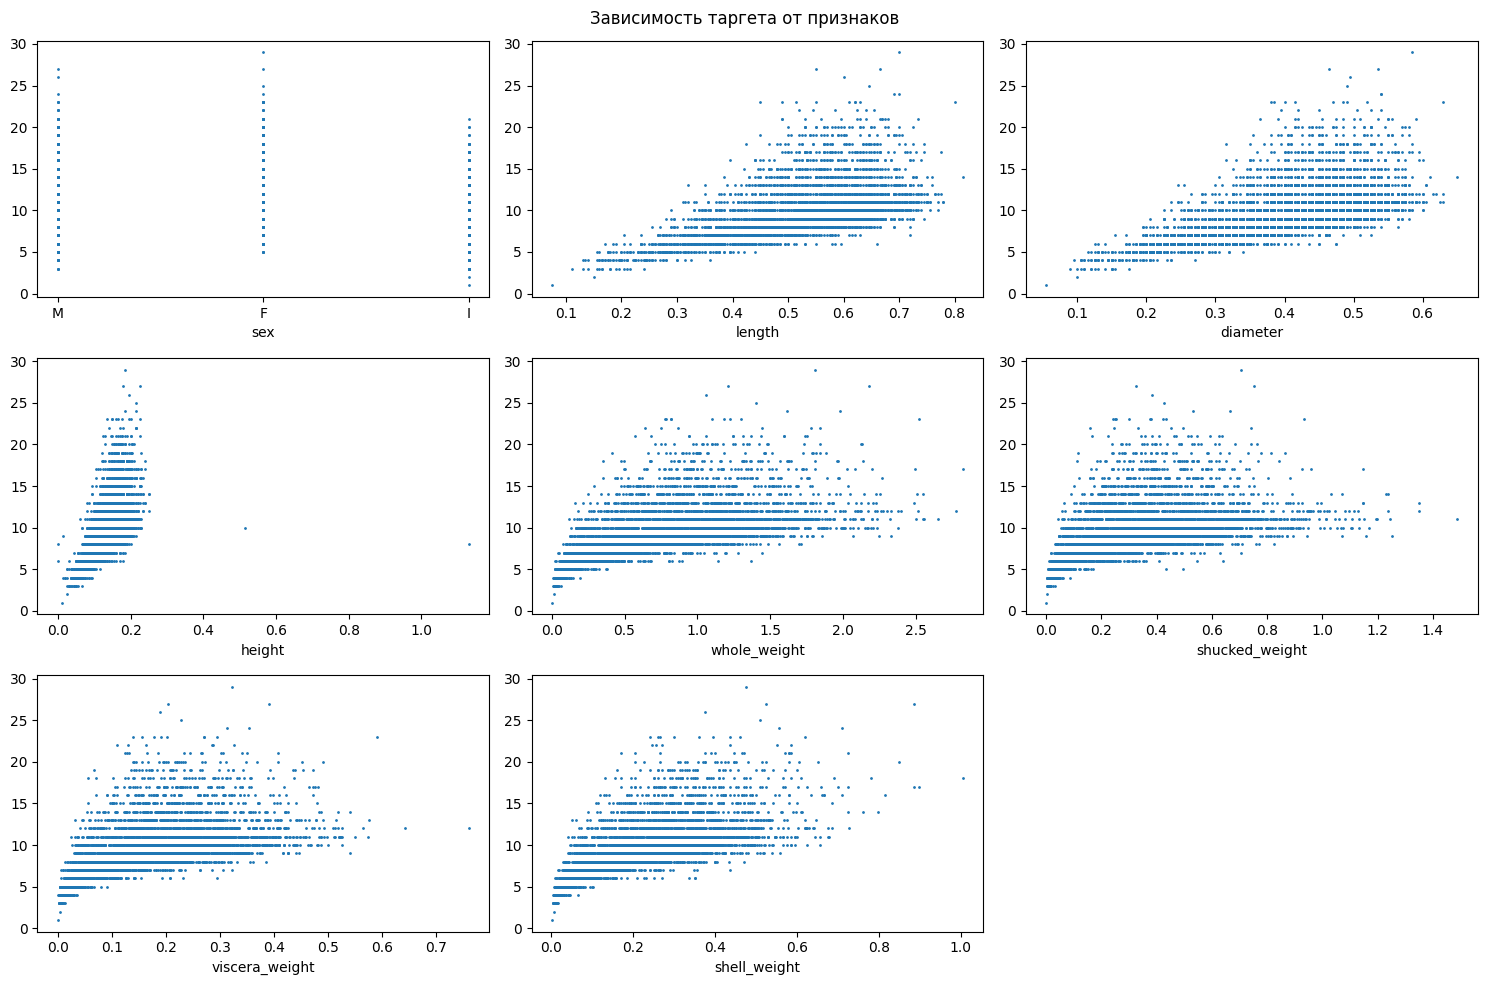

RMSE: 2.1744
MAE:  1.5200
R2:   0.5516


In [17]:
draw_dependence(df)

train, test = train_test_split(df, test_size=0.1, random_state=RANDOM_SEED)
log(train_and_evaluate(train, test))

Видно, что таргет зависит от признаков, связанных с весом, как логарифм или квадратный корень.

In [18]:
from sklearn.preprocessing import MinMaxScaler

df_copy = df.copy()
numeric_columns = df_copy.select_dtypes(include=['number']).columns.tolist()
feature_columns = [col for col in numeric_columns if col != TARGET]

train, test = train_test_split(df_copy, test_size=0.1, random_state=RANDOM_SEED)

scl = MinMaxScaler()
train_scaled = train.copy()
test_scaled = test.copy()

train_scaled[feature_columns] = scl.fit_transform(train[feature_columns]) + 1e-6
test_scaled[feature_columns] = scl.transform(test[feature_columns]) + 1e-6

train_scaled['rings'] = np.sqrt(train_scaled['rings'])
test_scaled['rings'] = np.sqrt(test_scaled['rings'])

train_scaled['whole_weight'] = np.sqrt(train_scaled['whole_weight'])
train_scaled['shucked_weight'] = np.sqrt(train_scaled['shucked_weight'])
train_scaled['viscera_weight'] = np.sqrt(train_scaled['viscera_weight'])
train_scaled['shell_weight'] = np.sqrt(train_scaled['shell_weight'])

test_scaled['whole_weight'] = np.sqrt(test_scaled['whole_weight'])
test_scaled['shucked_weight'] = np.sqrt(test_scaled['shucked_weight'])
test_scaled['viscera_weight'] = np.sqrt(test_scaled['viscera_weight'])
test_scaled['shell_weight'] = np.sqrt(test_scaled['shell_weight'])

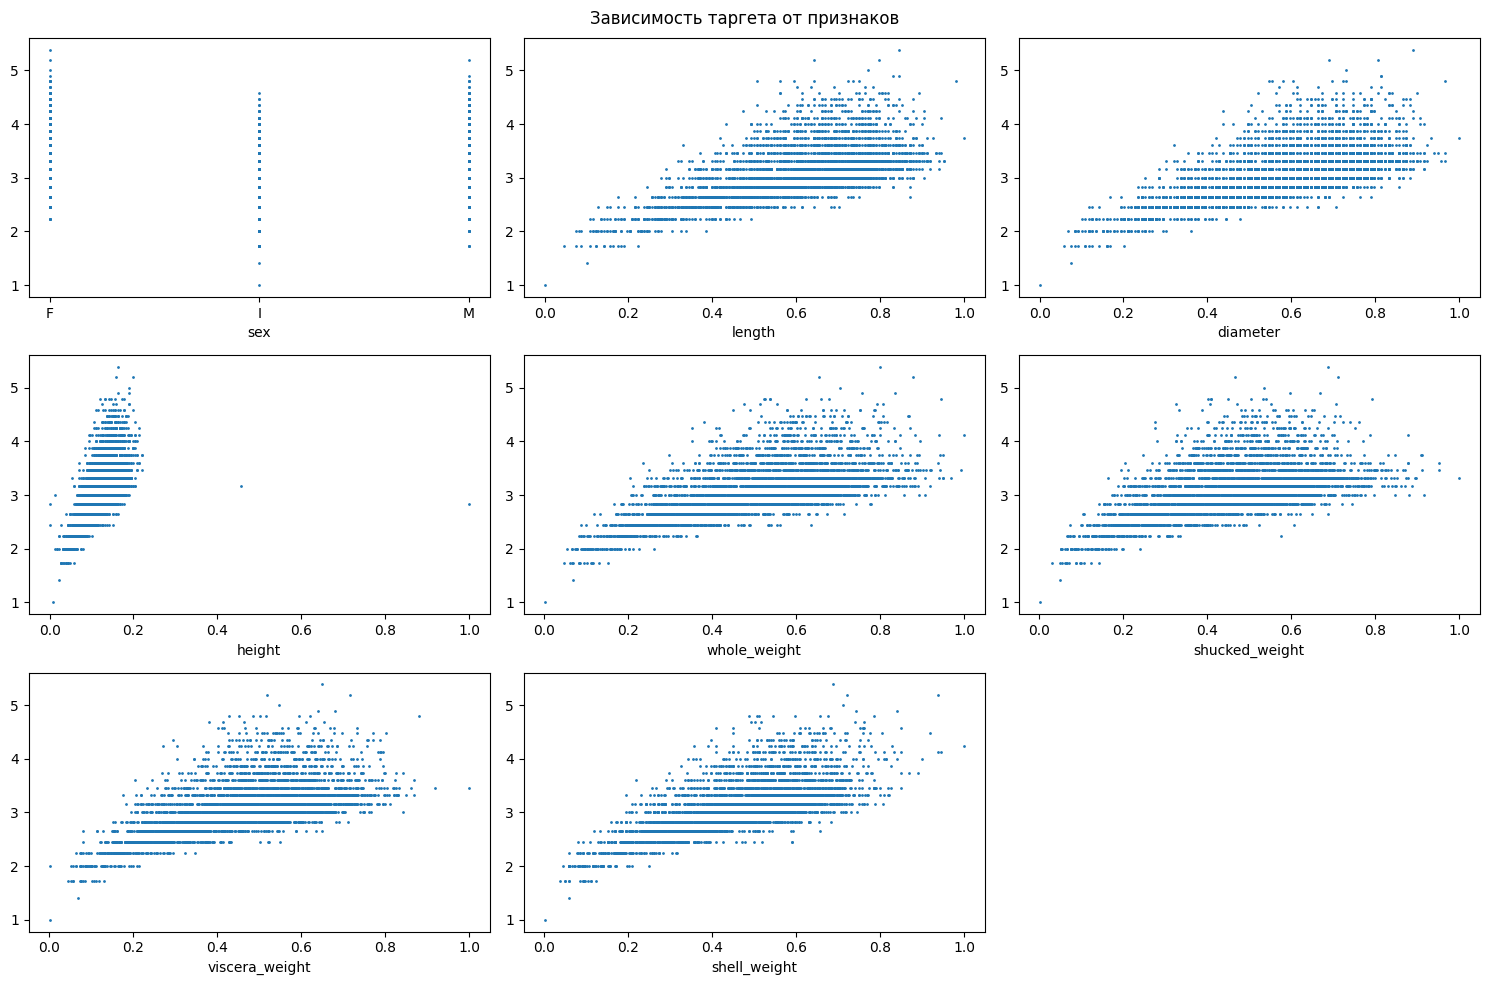

RMSE: 0.3140
MAE:  0.2289
R2:   0.6059


In [19]:
draw_dependence(train_scaled)
log(train_and_evaluate(train_scaled, test_scaled))

В height видны выборсы. Удалим их

In [20]:
quantile = train_scaled['height'].quantile(0.999)
train_scaled = train_scaled[train_scaled['height'] < quantile]
test_scaled = test_scaled[test_scaled['height'] < quantile]

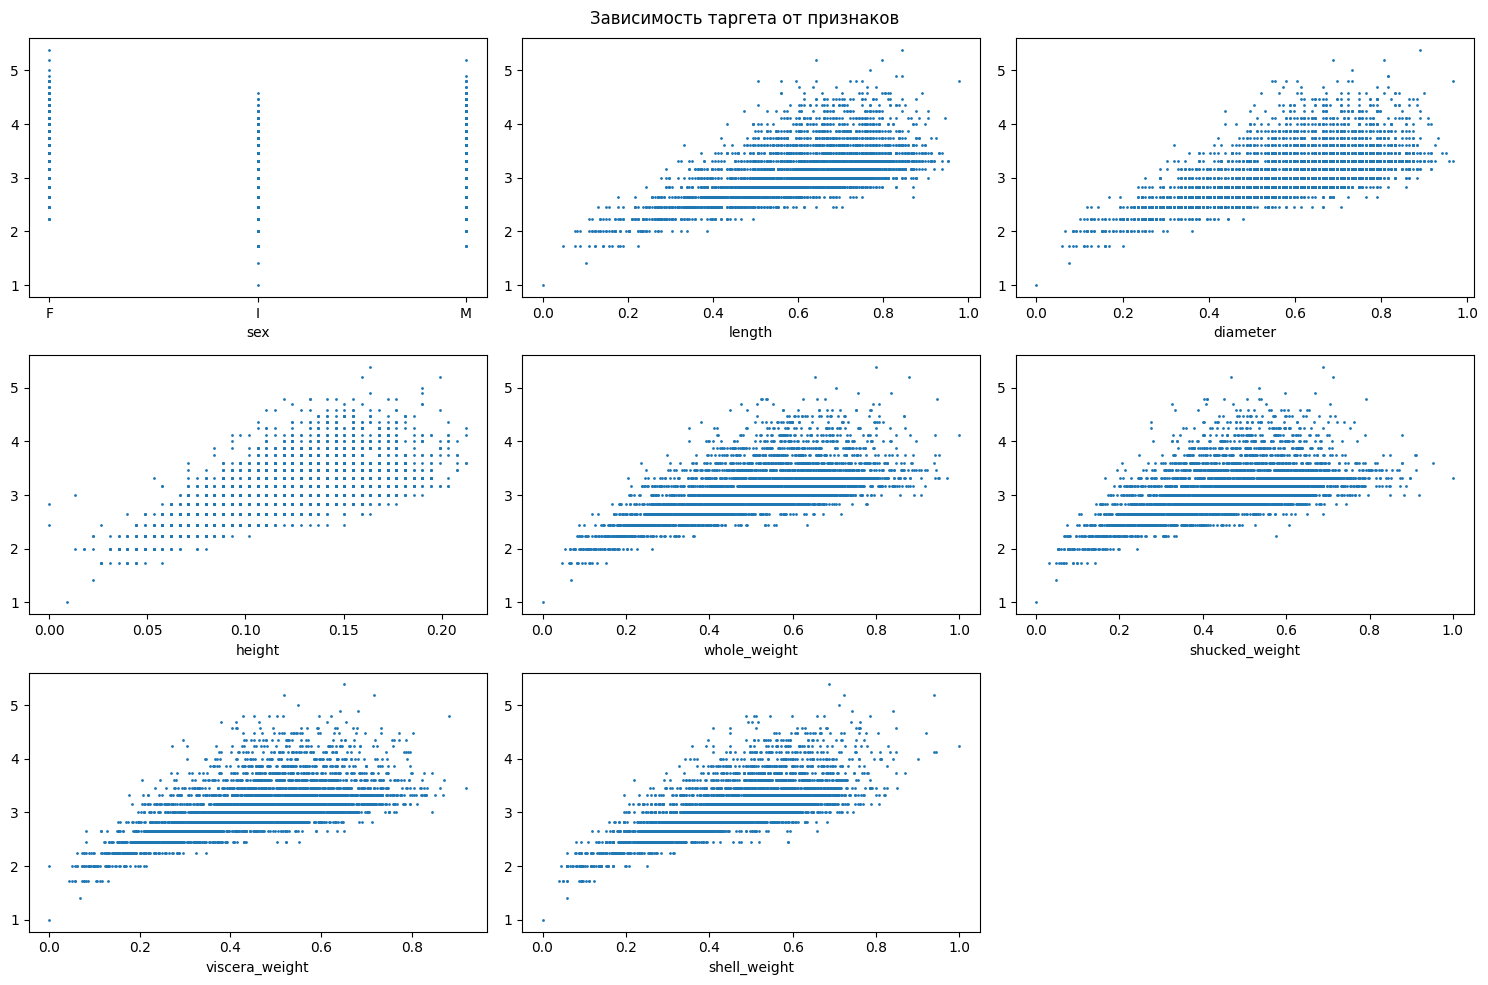

RMSE: 0.3136
MAE:  0.2302
R2:   0.6067


In [21]:
draw_dependence(train_scaled)
log(train_and_evaluate(train_scaled, test_scaled))

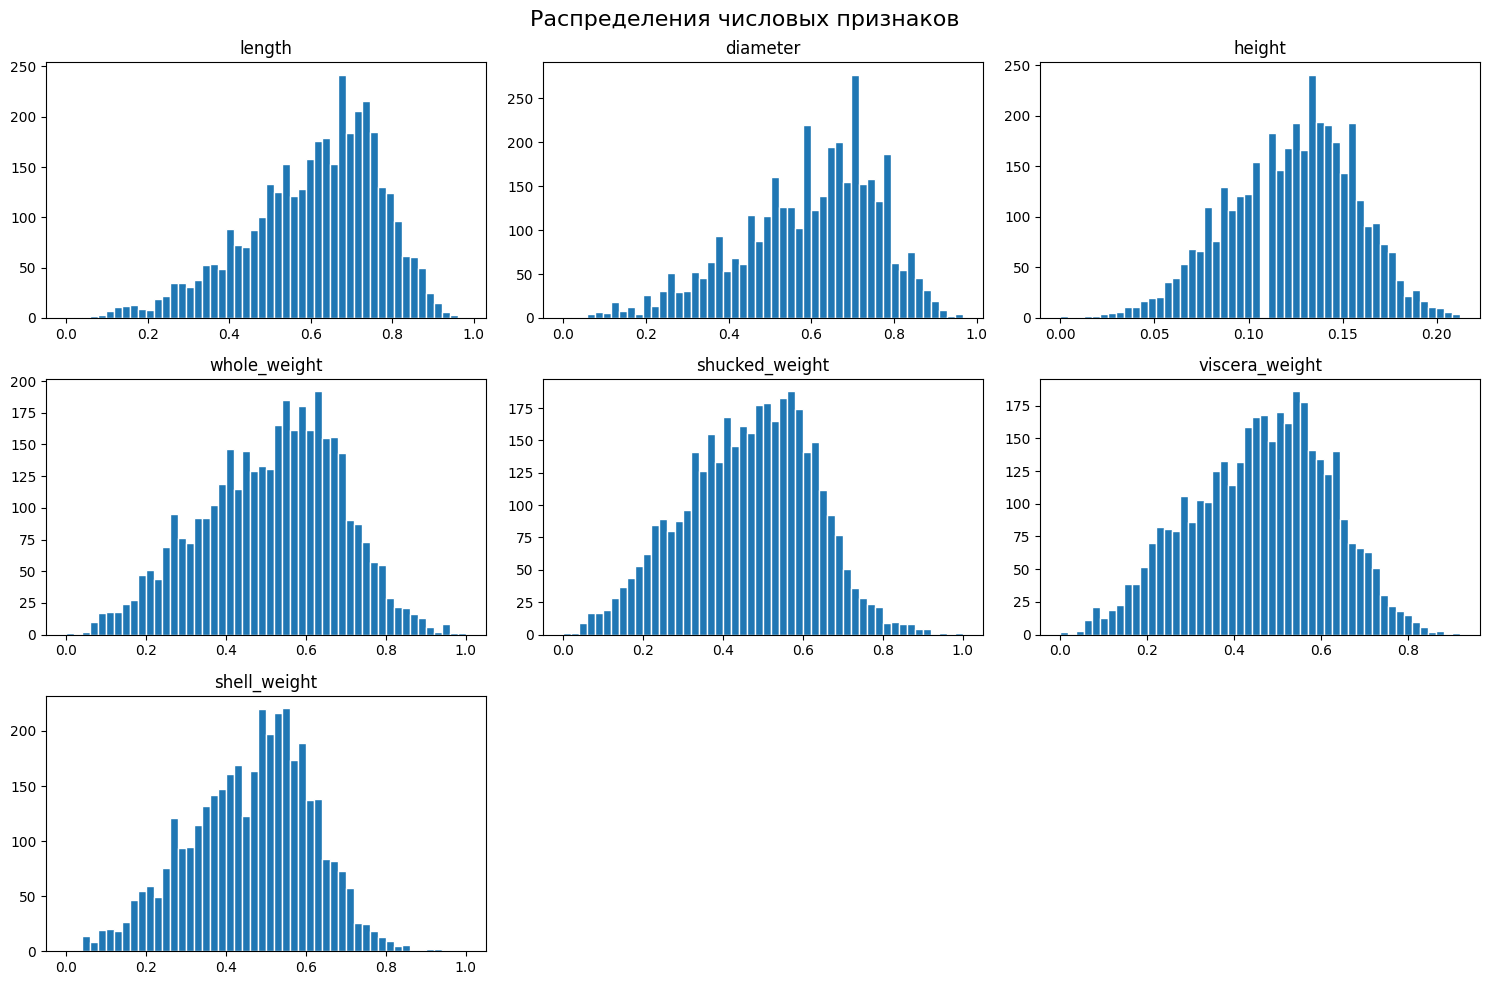

In [22]:
train_scaled.drop(columns=[TARGET]).hist(figsize=(15, 10), bins=50, edgecolor='white')
plt.suptitle("Распределения числовых признаков", fontsize=16)
plt.tight_layout()
for ax in plt.gcf().axes:
    ax.grid(False)
plt.show()

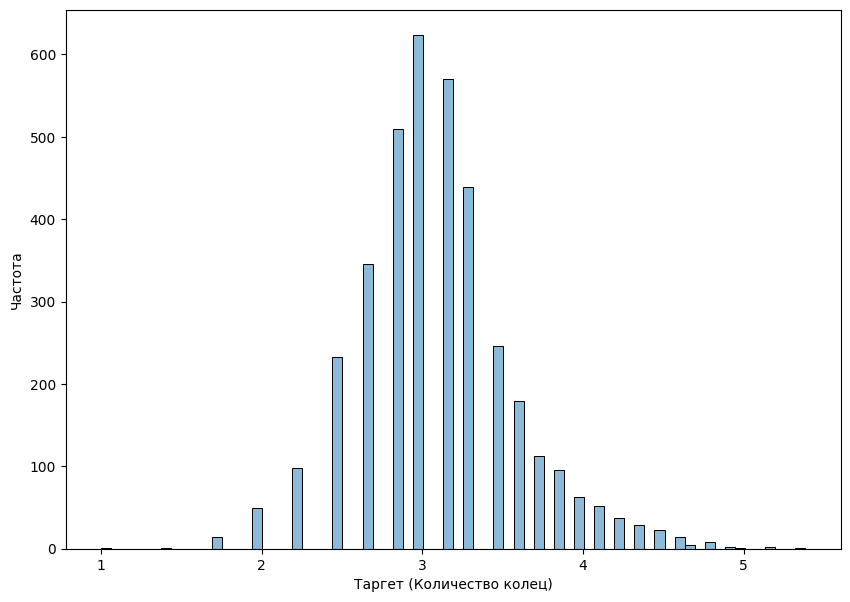

In [23]:
plt.figure(figsize=(10, 7))
sns.histplot(train_scaled[TARGET], alpha=0.5)
plt.xlabel('Таргет (Количество колец)')
plt.ylabel('Частота')
plt.show()

Попробуем логарифмирование вместо взятия корня

In [24]:
from sklearn.preprocessing import MinMaxScaler

df_copy = df.copy()
numeric_columns = df_copy.select_dtypes(include=['number']).columns.tolist()
feature_columns = [col for col in numeric_columns if col != TARGET]

train, test = train_test_split(df_copy, test_size=0.1, random_state=RANDOM_SEED)

scl = MinMaxScaler()
train_scaled = train.copy()
test_scaled = test.copy()

train_scaled[feature_columns] = scl.fit_transform(train[feature_columns]) + 1e-6
test_scaled[feature_columns] = scl.transform(test[feature_columns]) + 1e-6

train_scaled['rings'] = np.log(train_scaled['rings'])
test_scaled['rings'] = np.log(test_scaled['rings'])

train_scaled['whole_weight'] = np.log(train_scaled['whole_weight'])
train_scaled['shucked_weight'] = np.log(train_scaled['shucked_weight'])
train_scaled['viscera_weight'] = np.log(train_scaled['viscera_weight'])
train_scaled['shell_weight'] = np.log(train_scaled['shell_weight'])

test_scaled['whole_weight'] = np.log(test_scaled['whole_weight'])
test_scaled['shucked_weight'] = np.log(test_scaled['shucked_weight'])
test_scaled['viscera_weight'] = np.log(test_scaled['viscera_weight'])
test_scaled['shell_weight'] = np.log(test_scaled['shell_weight'])

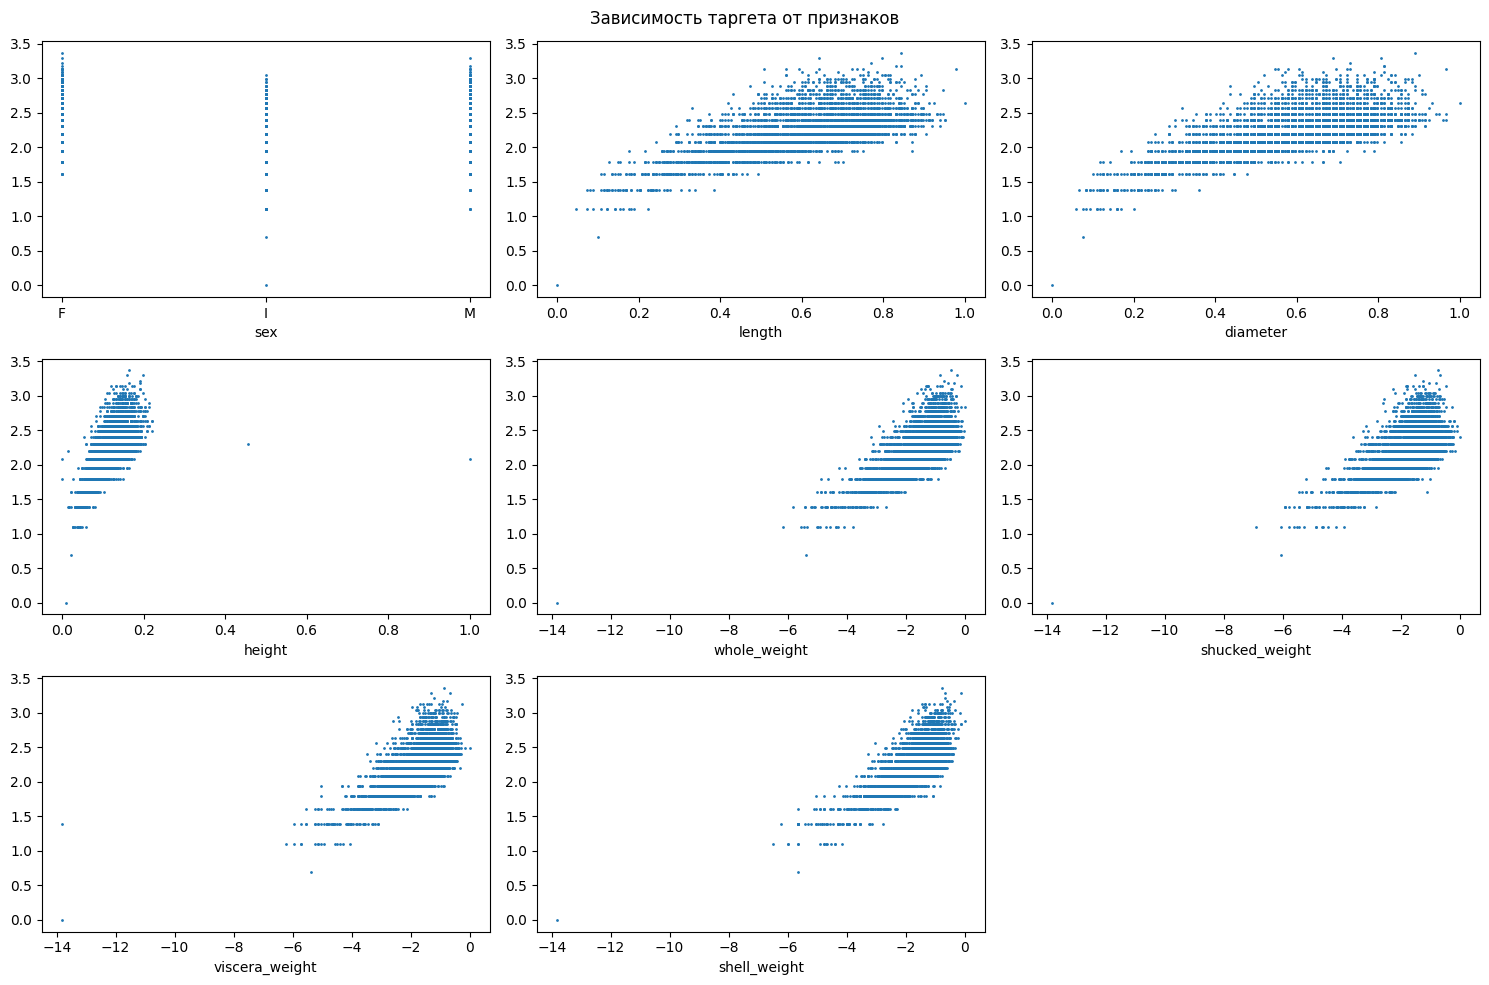

RMSE: 0.1933
MAE:  0.1425
R2:   0.6419


In [25]:
draw_dependence(train_scaled)
log(train_and_evaluate(train_scaled, test_scaled))

Попробуем избавиться от выбросов в новых данных

In [26]:
def delete_outliers(df: pd.DataFrame, low: float = 0.001, high: float = 0.999, exclude_target: bool = True):
    for col in df.select_dtypes(include=['number']).columns:
        if exclude_target and col == TARGET:
            continue
        low_value = df[col].quantile(low)
        high_value = df[col].quantile(high)
        df = df[(df[col] >= low_value) & (df[col] <= high_value)]
    return df

In [27]:
train_scaled = delete_outliers(train_scaled)

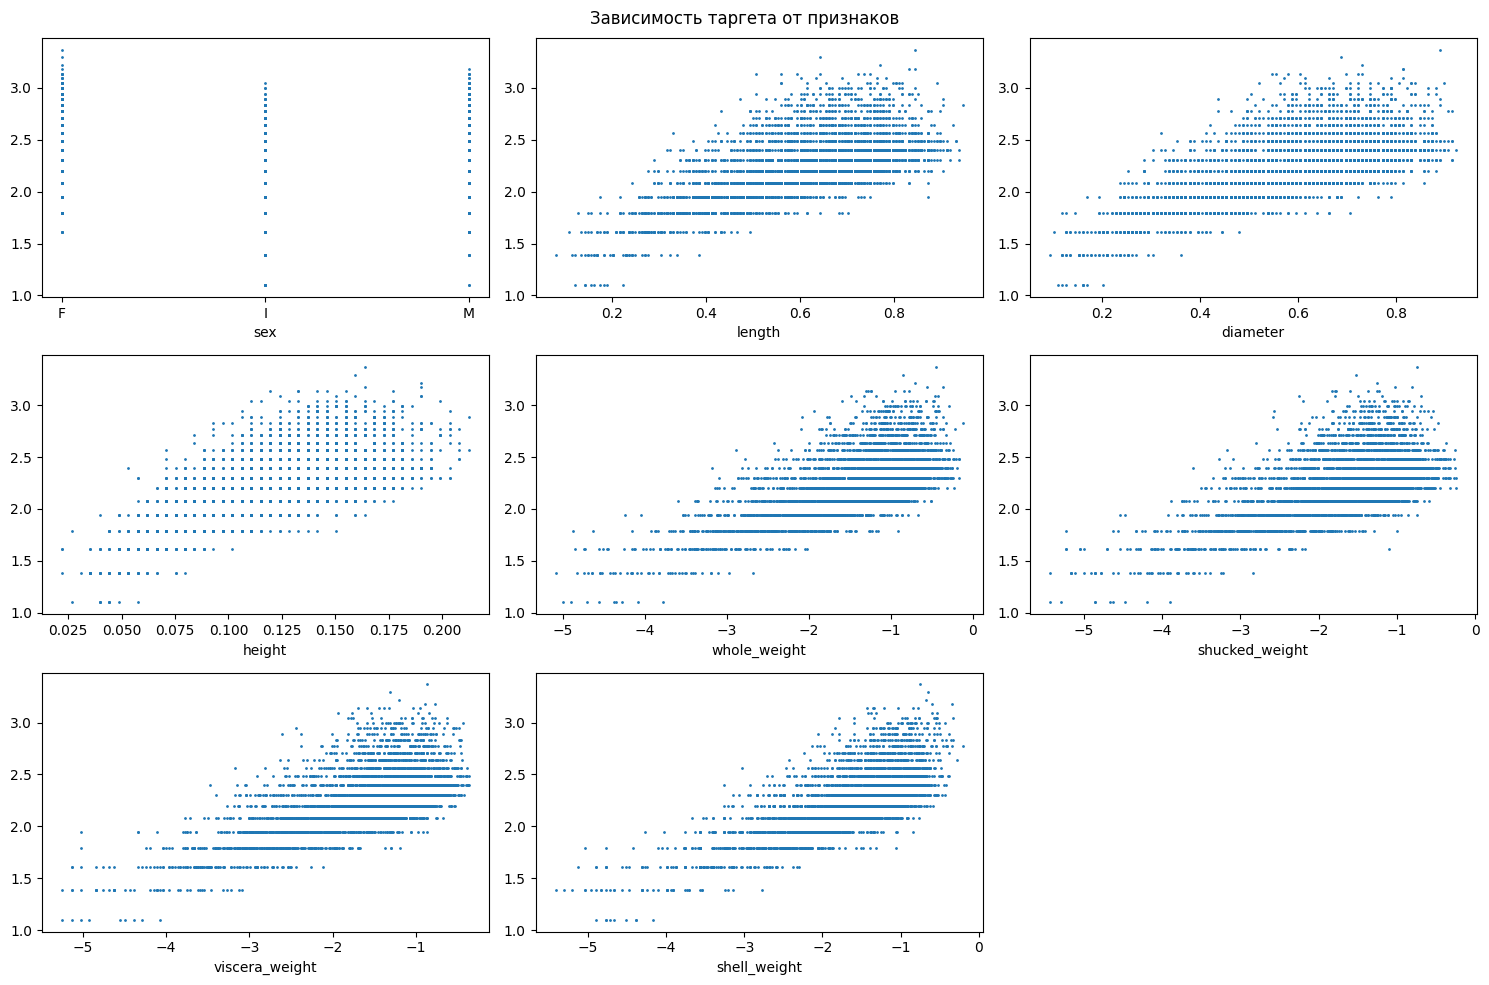

RMSE: 0.1913
MAE:  0.1415
R2:   0.6493


In [28]:
draw_dependence(train_scaled)
log(train_and_evaluate(train_scaled, test_scaled))

## 2.3. Обработка категориальных признаков

Давайте попробуем разные способы кодирования признака `sex`. Начнём с самого простого: OneHotEncoding.

In [29]:
from sklearn.preprocessing import OneHotEncoder

ohe_encoder = OneHotEncoder(sparse_output=False, drop='first')
train_encoded_df = ohe_encoder.fit_transform(train_scaled[['sex']])
test_encoded_df = ohe_encoder.transform(test_scaled[['sex']])

# Получаем имена новых столбцов
feature_names = ohe_encoder.get_feature_names_out(['sex'])

# Преобразуем обратно в DataFrame
train_result = pd.concat([
    train_scaled.select_dtypes(include='number'),
    pd.DataFrame(train_encoded_df, columns=feature_names,
                 index=train_scaled.index)
], axis=1)
test_result = pd.concat([
    test_scaled.select_dtypes(include='number'),
    pd.DataFrame(test_encoded_df, columns=feature_names,
                 index=test_scaled.index)
], axis=1)

In [30]:
log(train_and_evaluate(train_result, test_result))

RMSE: 0.1880
MAE:  0.1397
R2:   0.6613


В целом какие-то другие техники кодирования я не вижу смысла применять. Можно попробовать сделать немного рукамахательное действие: обучить три разные модели для трёх разных полов, и в целом это должно иметь смысл, так как особи разных полов будут иметь разные зависимости таргета от размера и веса, но с другой стороны потеряется общая информация о всём виде. Тем не менее, попробуем

In [31]:
for sex in train_scaled['sex'].unique():
    log(train_and_evaluate(train_scaled[train_scaled['sex'] == sex], test_scaled[test_scaled['sex'] == sex]))
    print()

RMSE: 0.1795
MAE:  0.1391
R2:   0.4548

RMSE: 0.1669
MAE:  0.1331
R2:   0.6585

RMSE: 0.1871
MAE:  0.1386
R2:   0.5547



Не помогло

И наконец глянем на скоррелированность признаков

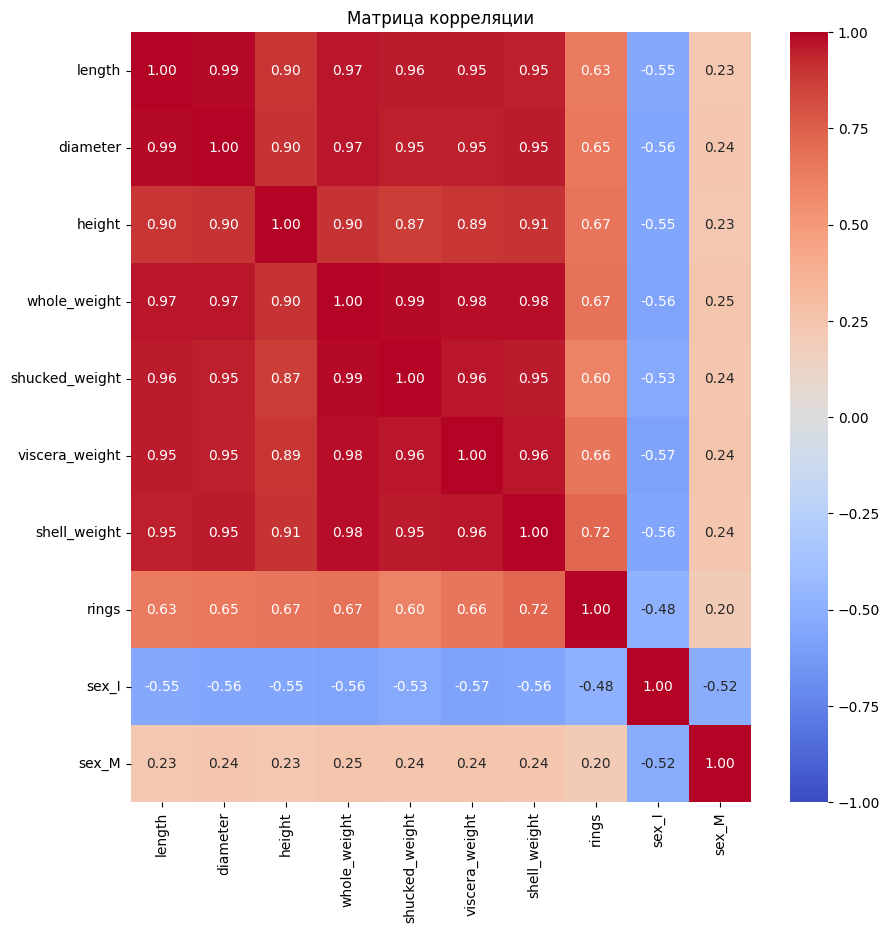

In [32]:
draw_corr_matrix(train_result, include_target=True)

# 3. Обучение моделей

In [33]:
X_train = train_result.drop(TARGET, axis=1)
y_train = train_result[TARGET]

X_test = test_result.drop(TARGET, axis=1)
y_test = test_result[TARGET]

Аналитическое решение

In [34]:
from sklearn.linear_model import LinearRegression

model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
log(evaluate(model_lr.predict(X_test), y_test))

RMSE: 0.1880
MAE:  0.1397
R2:   0.6613


In [35]:
from sklearn.linear_model import Ridge


model_ridge = Ridge(alpha=6.0)
model_ridge.fit(X_train, y_train)
log(evaluate(model_ridge.predict(X_test), y_test))

RMSE: 0.1875
MAE:  0.1397
R2:   0.6632


In [36]:
from sklearn.linear_model import Lasso


model_lasso = Lasso(alpha=0.001, max_iter=100_000)
model_lasso.fit(X_train, y_train)
log(evaluate(model_lasso.predict(X_test), y_test))

RMSE: 0.1885
MAE:  0.1408
R2:   0.6594


In [37]:
from sklearn.ensemble import RandomForestRegressor


model_rf = RandomForestRegressor(
    n_estimators=200,
    max_depth=None,
    random_state=RANDOM_SEED,
    n_jobs=-1
)
model_rf.fit(X_train, y_train)
log(evaluate(model_rf.predict(X_test), y_test))

RMSE: 0.1841
MAE:  0.1422
R2:   0.6750


In [38]:
class MyLinearRegressionSGD:
    def __init__(self, learning_rate=0.01, n_iterations=1000, batch_size=32, decay=0.0):
        self.lr = learning_rate
        self.n_iter = n_iterations
        self.batch_size = batch_size
        self.decay = decay  # коэффициент затухания (например, 0.001)
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        X = np.array(X, dtype=np.float64)
        y = np.array(y, dtype=np.float64).flatten()
        n_samples, n_features = X.shape

        # Инициализация
        self.weights = np.random.randn(n_features) * 0.01
        self.bias = 0.0

        for i in range(self.n_iter):
            # Текущий learning rate с затуханием
            lr = self.lr / (1 + self.decay * i)

            # Перемешиваем индексы
            indices = np.random.permutation(n_samples)

            # Проходим по батчам
            for start in range(0, n_samples, self.batch_size):
                end = start + self.batch_size
                batch_idx = indices[start:end]

                X_batch = X[batch_idx]
                y_batch = y[batch_idx]

                # Предсказание
                y_pred = X_batch @ self.weights + self.bias

                # Градиенты
                error = y_pred - y_batch
                dw = (2 / len(batch_idx)) * X_batch.T @ error
                db = (2 / len(batch_idx)) * np.sum(error)

                # Обновление весов
                self.weights -= lr * dw
                self.bias -= lr * db

    def predict(self, X):
        X = np.array(X, dtype=np.float64)
        return X @ self.weights + self.bias

In [39]:
model_mlr = MyLinearRegressionSGD(learning_rate=0.01, n_iterations=10_000)
model_mlr.fit(X_train, y_train)
log(evaluate(model_mlr.predict(X_test), y_test))

RMSE: 0.1881
MAE:  0.1403
R2:   0.6607


In [40]:
from sklearn.ensemble import GradientBoostingRegressor

model_gb = GradientBoostingRegressor(
    n_estimators=100,
    max_depth=4,
    random_state=RANDOM_SEED,
    learning_rate=0.1
)
model_gb.fit(X_train, y_train)
log(evaluate(model_gb.predict(X_test), y_test))

RMSE: 0.1788
MAE:  0.1379
R2:   0.6936


# 4. Важность признаков

In [41]:
feature_names = X_train.columns

coef = model_lr.coef_
importance_lr = np.abs(coef)

df_lr = pd.DataFrame({
    'feature': feature_names,
    'importance': importance_lr
}).sort_values('importance', ascending=False)

df_lr

,feature,importance
2,height,1.053200
0,length,0.629416
3,whole_weight,0.608443
4,shucked_weight,0.579776
6,shell_weight,0.363415
1,diameter,0.161491
5,viscera_weight,0.076221
7,sex_I,0.052649
8,sex_M,0.003001


In [42]:
coef_lasso = model_lasso.coef_
importance_lasso = np.abs(coef_lasso)

df_lasso = pd.DataFrame({
    'feature': feature_names,
    'importance': importance_lasso
}).sort_values('importance', ascending=False)

df_lasso

,feature,importance
6,shell_weight,0.455551
4,shucked_weight,0.450613
3,whole_weight,0.259968
7,sex_I,0.055561
0,length,0.000000
1,diameter,0.000000
2,height,0.000000
5,viscera_weight,0.000000
8,sex_M,0.000000


Результаты Lasso очень любопытные. Получается, что возраст не зависит от размера...? По крайней мере многие признаки очень скоррелированы, поэтому вполне возможно что модель отбросила ненужные признаки, которые не сильно улучшают качество и всё равно почти полностью объясняются другими признаками

In [43]:
importance_rf = model_rf.feature_importances_

df_rf = pd.DataFrame({
    'feature': feature_names,
    'importance': importance_rf
}).sort_values('importance', ascending=False)

df_rf

,feature,importance
6,shell_weight,0.553869
4,shucked_weight,0.127200
1,diameter,0.067472
3,whole_weight,0.067264
5,viscera_weight,0.066707
0,length,0.043698
2,height,0.042468
7,sex_I,0.024569
8,sex_M,0.006753


In [44]:
importance_gb = model_gb.feature_importances_

df_gb = pd.DataFrame({
    'feature': feature_names,
    'importance': importance_gb
}).sort_values('importance', ascending=False)

df_gb

,feature,importance
6,shell_weight,0.707881
4,shucked_weight,0.121593
1,diameter,0.048942
3,whole_weight,0.033375
7,sex_I,0.028783
2,height,0.026742
5,viscera_weight,0.015493
0,length,0.014991
8,sex_M,0.002201
